In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
#%matplotlib inline # 作用是内嵌画图，省略掉plt.show()这一步，直接显示图像
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical 
import tensorflow as tf
import os,glob,skimage,librosa
import librosa.display

import warnings
warnings.filterwarnings("ignore")

In [13]:
dataframe = pd.read_csv('D:/music_genre_recognition/Data/features_3_sec.csv')
dataframe.head()
classNames = list(set(dataframe['label']))

X  = dataframe.drop(['filename','length','label'], axis = 1)
Y_ = [classNames.index(i) for i in dataframe['label']]
Y  = to_categorical(Y_)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 1, test_size=0.25)

X.shape, Y.shape

((9990, 57), (9990, 10))
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test  = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

In [14]:
from tensorflow import keras

def keras_model(optimizer='adam', init='glorot_uniform'):
 
    model = keras.models.Sequential([
      
      keras.layers.Dense(1024, activation='relu', kernel_initializer=init, input_shape=(X_train.shape[1],)),
      keras.layers.Dropout(0.4),
      keras.layers.BatchNormalization(), 
        
      keras.layers.Dense(512, activation='relu', kernel_initializer=init),
      keras.layers.Dropout(0.4),
      keras.layers.BatchNormalization(),                                                  
      
      keras.layers.Dense(256, activation='relu', kernel_initializer=init),
      keras.layers.Dropout(0.4),
      keras.layers.BatchNormalization(),
        
      keras.layers.Dense(128, kernel_initializer=init, activation='relu'),
      keras.layers.Dropout(0.4),
      keras.layers.BatchNormalization(),
        
      keras.layers.Dense(64, kernel_initializer=init, activation='relu'),
      keras.layers.Dropout(0.4),
      keras.layers.BatchNormalization(),

      keras.layers.Dense(10, activation='softmax'),
    ])
 
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model = keras_model()
# 打印网络结构
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │        59,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 765,258 (2.92 MB)

 Trainable params: 761,290 (2.90 MB)

 Non-trainable params: 3,968 (15.50 KB)

In [30]:
history = model.fit(
    X_train,
    Y_train,
    epochs=100,
    validation_split=0.2
)
predictions = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print(score)




Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8956 - loss: 0.3511 - val_accuracy: 0.9893 - val_loss: 0.0392
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8920 - loss: 0.3554 - val_accuracy: 0.9900 - val_loss: 0.0419
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8958 - loss: 0.3503 - val_accuracy: 0.9873 - val_loss: 0.0554
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8865 - loss: 0.3652 - val_accuracy: 0.9813 - val_loss: 0.0591
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8984 - loss: 0.3266 - val_accuracy: 0.9813 - val_loss: 0.0628
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8985 - loss: 0.3285 - val_accuracy: 0.9827 - val_loss: 0.0632
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8959 - loss: 0.3506 - val_accuracy: 0.9820 - val_loss: 0.0643
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8941 - loss: 0.3221 - val_accu

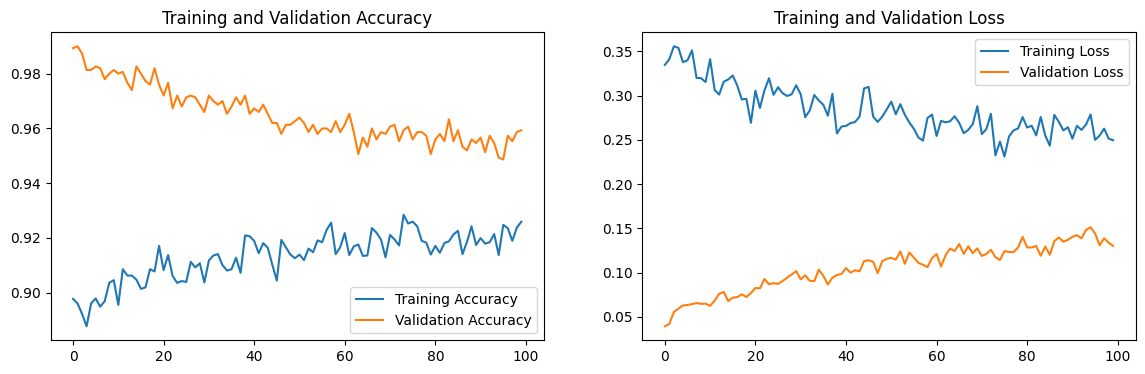

In [31]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)

plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()